## This notebook demonstrates the use of PCA and T-SNE for dimensionality reduction

**The dataset used is the same MNIST dataset**

We first do the standard stuff as in the previous programs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
import os


In [2]:
#traindata = pd.read_csv('train.csv')
traindata = pd.read_csv('data/MNIST/train.csv')
traindata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data here has the labels in the first column, and the actual pixels of the digit in the other columns. We will now separate them.

In [3]:
labels = np.asarray(traindata.label) 
digits = np.asarray(traindata)
digits = digits[:,1:]

The labels array contains the labels of the data. The digits array contais the actual data, one digit per row. The digits are 28x28 pixels. Now we will trite a small function to visualize any digit we want.

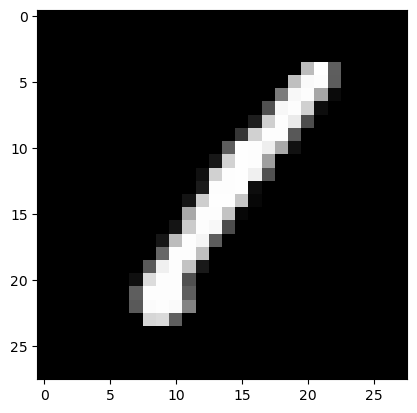

In [4]:
def getDigit(arr):
    pic = np.reshape(arr,[28,28])
    pic = np.uint8(pic)
    return pic

pic = getDigit(digits[0,:])
plt.imshow(pic,'gray')

... and a bunch of them.

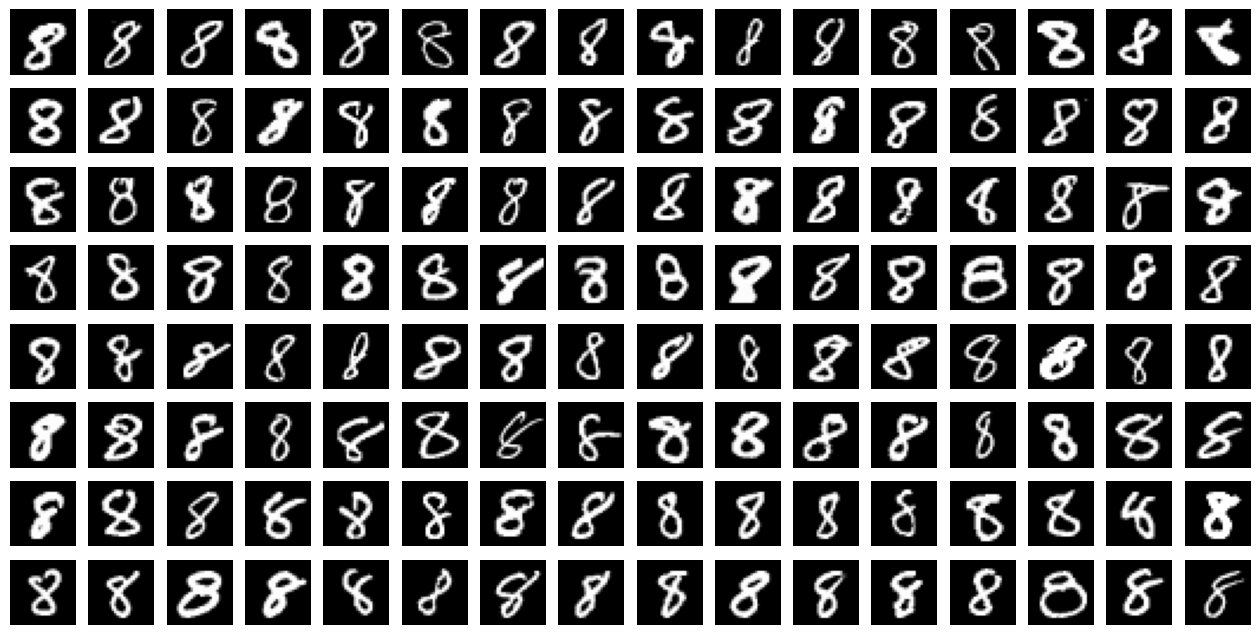

In [5]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
digit_we_need_to_see = 8

for row in range(digits.shape[0]):
    if labels[row]==digit_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()


## Principal Component Analysis ##

Here we reduce the data to 10 dimensions and work with that reduced data to see how that works for us.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
normDigits = scaler.fit_transform(digits)
normDigits[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.28063530e-03, -6.87837385e-03, -4.87955846e-03, -4.87955846e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.87955846e-03, -5.62918092e-03, -9.32058423e-03, -1.17998060e-02,
       -1.63061719e-02, -2.03752520e-02, -2.59514740e-02, -2.99643170e-02,
       -3.19107654e-02, -3.22486821e-02, -3.25422311e-02, -2.99246677e-02,
       -2.98195932e-02, -2.79072967e-02, -2.35148150e-02, -1.75808468e-02,
       -1.53656634e-02, -9.63815429e-03, -8.30613350e-03, -5.23595180e-03,
        0.00000000e+00,  

In [8]:
pca = PCA(n_components=10)
lowdigits = pca.fit_transform(normDigits)
print(lowdigits.shape)
print(lowdigits[0,:])


(42000, 10)
[-5.14047831 -5.22640947  3.88692042 -0.90192081  4.92947034  2.03382789
  4.72134546 -4.76281149  0.24207105 -1.41204728]


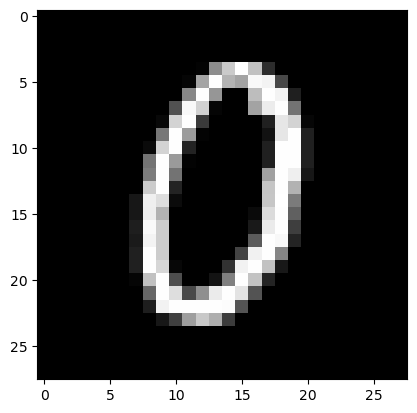

In [9]:
k = 5
plt.imshow(getDigit(digits[k]),'gray')

In [19]:
# Reconstructed digits
def reconstruct(lowdigit, model):
    digit = np.matmul(lowdigit,pca.components_)
    #Have to normalize in the range [0,255] if I want to see them
    d = digit - min(digit)
    d = d / max(d)
    d = np.uint8(d*255)
    return getDigit(d)

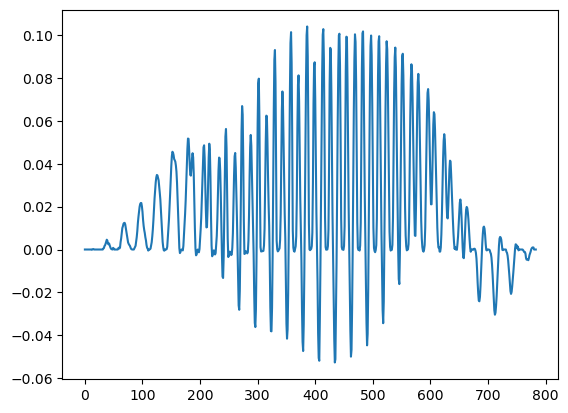

In [11]:
plt.plot(pca.components_[0])

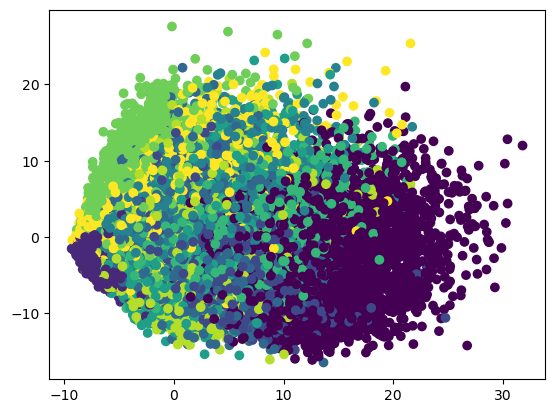

In [12]:
plt.scatter(lowdigits[:,0],lowdigits[:,1],c=labels)

In [15]:
model = KMeans(10)
model.fit(lowdigits)



/Users/tardis/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

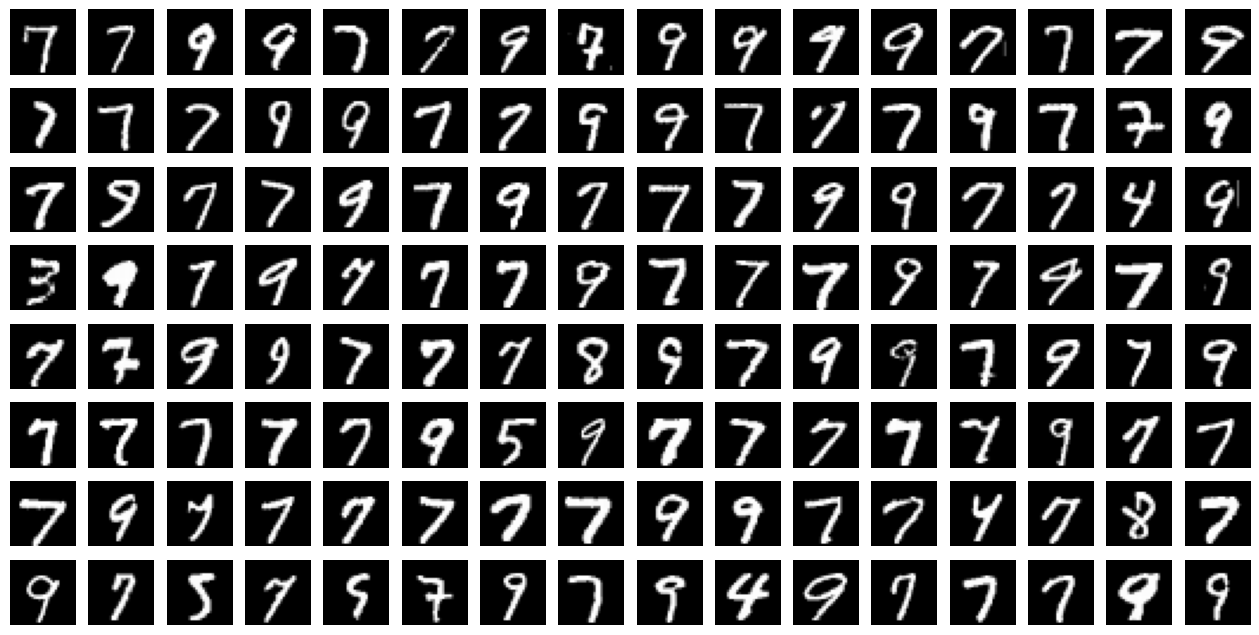

In [17]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 0

for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()

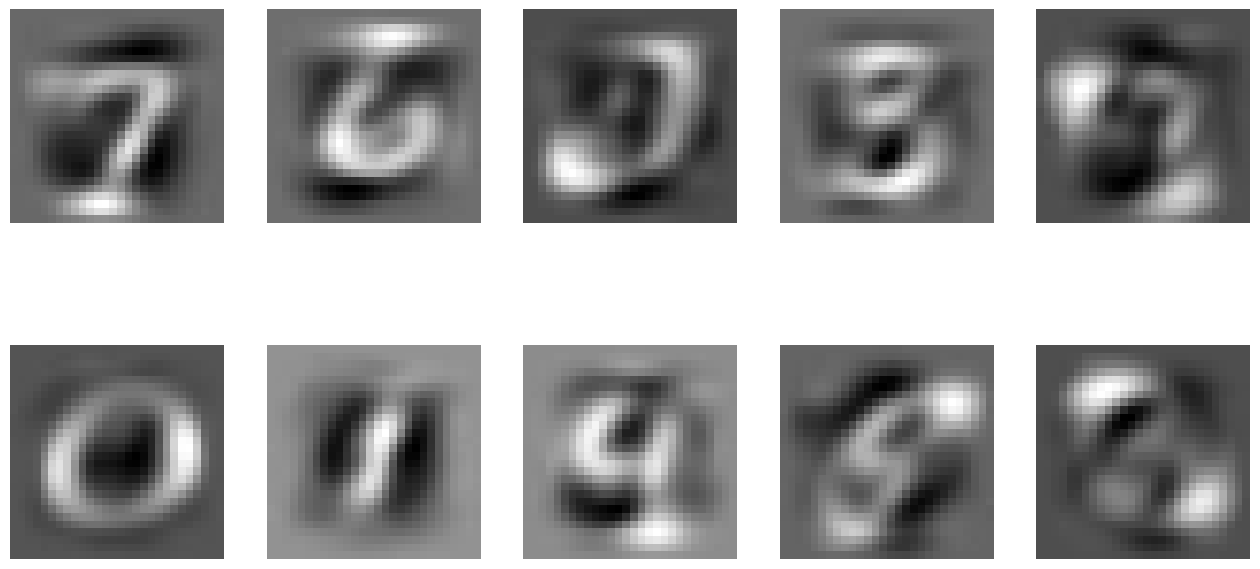

In [21]:
# Display the cluster centers
fig = plt.figure(figsize=(16, 8))
for i in range(model.cluster_centers_.shape[0]):
        ax = fig.add_subplot(2,5,i+1)
        ax.imshow(reconstruct(model.cluster_centers_[i,:],model),'gray')
        ax.axis('off')
plt.show()

## T-SNE ##

In [22]:
from sklearn.manifold import TSNE

In [23]:
# digits_embedded = TSNE(n_components=2).fit_transform(lowdigits)

t_model = TSNE(n_components = 2)
digits_embedded = t_model.fit_transform(lowdigits)
digits_embedded.shape

(42000, 2)

In [ ]:
digits_embedded[0]

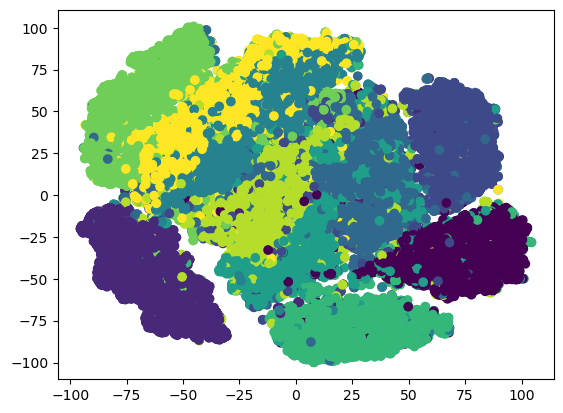

In [24]:
fig, ax = plt.subplots()
x = digits_embedded[:,0]
y = digits_embedded[:,1]
ax.scatter(x, y,c=labels)
